In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import git

import uproot as ut
import awkward as ak
import numpy as np
import math
import vector
import sympy as sp

import re
from tqdm import tqdm
import timeit

sys.path.append( git.Repo('.', search_parent_directories=True).working_tree_dir )
from utils import *

In [2]:
filename = "NanoAOD/NMSSM_XYH_YToHH_6b_MX_700_MY_400_accstudies_500k_Jul2021.root"
tree = Tree(filename)
preselection = Selection(tree,cuts={"njetcut":6},tag="preselection")
sixb_in_preselection = preselection.nsixb_selected == 6
print(preselection)
baseline = Selection(tree,mask=sixb_in_preselection,include=preselection,tag="baseline")
print(baseline)

--- all preselection / pt ---
Event Efficiency:   0.74
Selected Purity(6): 0.29
Passed Jet S/T:     0.69
Passed Jet MR:      0.40
Passed Jet Eff:     0.95
--- all baseline / pt ---
Event Efficiency:   0.29
Selected Purity(6): 1.00
Passed Jet S/T:     0.79
Passed Jet MR:      0.33
Passed Jet Eff:     1.00


In [3]:
btag_jets = [ Selection(tree,cuts={"btagcut":jet_btagWP[wp]},include=baseline,tag=f"{wplabels[wp]} btag") for wp in range(4) ]

In [4]:
btag_jets_scores = np.vectorize(lambda a:a.score())(btag_jets)

In [6]:
jet_misstr = np.vectorize(lambda a:a.jet_misstr)(btag_jets_scores)
jet_eff = np.vectorize(lambda a:a.jet_eff)(btag_jets_scores)

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Signal MR', ylabel='Signal Eff'>)

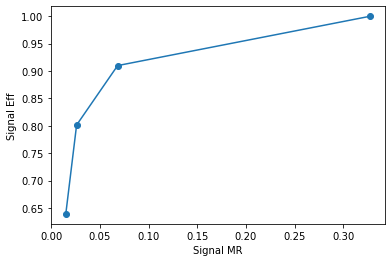

In [21]:
graph_simple(jet_misstr,jet_eff,xlabel="Signal MR",ylabel="Signal Eff")

In [15]:
nbtag_jets = Selection(tree,previous=btag_jets[1],include=baseline,tag="<loose btag")
sixb_nbtag_mask = nbtag_jets.nsixb_selected > 0

--- all loose btag / pt | all <loose btag / pt ---
Event Efficiency:   0.57
Selected Purity(6): 0.00
Passed Jet S/T:     0.00
Passed Jet MR:      0.26
Passed Jet Eff:     0.00


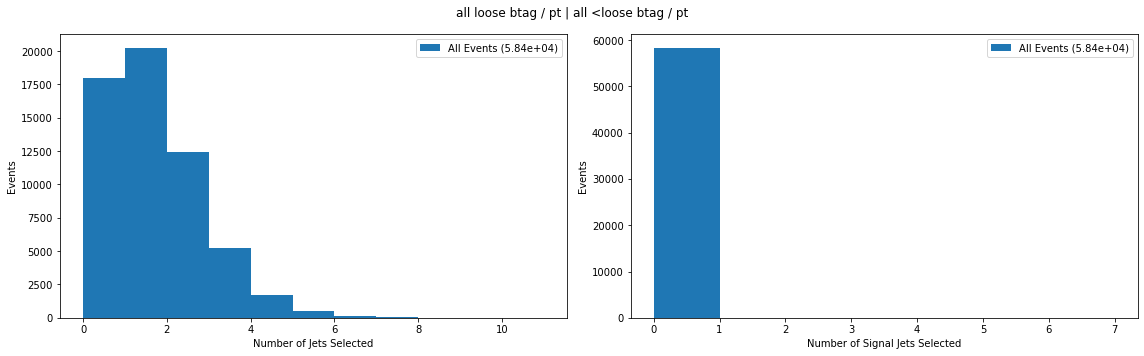

In [27]:
njet_study(nbtag_jets,topbkg=1,mask=sixb_nbtag_mask == False)